In [1]:
# Basic Necessities
import pandas as pd
import numpy as np
import re


# Plotting Packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing classes from our codes
from Detector import EmoticonDetector
ed = EmoticonDetector()
from Detector import wordDetector
wd = wordDetector()


# Reading Data

In [2]:
train_data = pd.read_csv('data/train_clean_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data = pd.read_csv('data/test_clean_data.csv')
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
train_data.head()

,tweet_id,sentiment,tweet_text,clean_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit go chapel hill sat happy
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott still shit watch rafa johnny deal
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,not gsp fan hate nick diaz can not wait
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general say israel iron dome can not d...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran amour obama try establish tie mullah vi...


# Extraction of Additional Features from tweets

In [4]:
# Functions for extracting the additional features from the tweets
def add_column(column_name, column_content):
    processed_data.loc[:, column_name] = pd.Series(column_content, index=processed_data.index)

def count_by_lambda(expression, word_array):
    return len(list(filter(expression, word_array)))

def add_extra_feature(df, tweet_column):
    
    # Print Number of Exclamation
    df['number_of_exclamation'] = tweet_column.apply(lambda x: (len(re.findall(r'!', x))))
    
    # Number of ?
    df['number_of_questionmark'] = tweet_column.apply(lambda x: (len(re.findall(r'[?]', x))))
    
    # Number of #
    df['number_of_hashtag'] = tweet_column.apply(lambda x: (len(re.findall(r'#', x))))
    
    # Number of @
    df['number_of_mention'] = tweet_column.apply(lambda x: (len(re.findall(r'@', x))))
    
    # Positive And Negative Emoticons
    add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["tweet_text"]))

    positive_emo = list(map(lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and ed.is_positive(word), txt),processed_data["splitted_text"]))
    add_column("number_of_positive_emo", positive_emo)

    negative_emo = list(map(
        lambda txt: count_by_lambda(lambda word: ed.is_emoticon(word) and not ed.is_positive(word), txt),
        processed_data["splitted_text"]))

    add_column("number_of_negative_emo", negative_emo)

    df['number_of_positive_emo'] = positive_emo
    df['number_of_negative_emo'] = negative_emo
    
    #Positive and Negative Words
    add_column("splitted_text", map(lambda txt: txt.split(" "), processed_data["clean_text"]))

    positive_word = list(map(lambda txt: count_by_lambda(lambda word: wd.is_word(word) and wd.is_positive(word), txt),processed_data["splitted_text"]))
    add_column("number_of_positive_words", positive_word)

    negative_word = list(map(
        lambda txt: count_by_lambda(lambda word: wd.is_word(word) and not wd.is_positive(word), txt),
        processed_data["splitted_text"]))

    add_column("number_of_negative_words", negative_word)
    
    df['number_of_positive_words'] = positive_word
    df['number_of_negative_words'] = negative_word

In [5]:
# Adding the additional features to the dataframe
processed_data = train_data.copy()
add_extra_feature(train_data, train_data["tweet_text"])


In [6]:
train_data.head()

,tweet_id,sentiment,tweet_text,clean_text,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_positive_emo,number_of_negative_emo,number_of_positive_words,number_of_negative_words
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit go chapel hill sat happy,4,0,0,0,1,0,1,1
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott still shit watch rafa johnny deal,0,0,0,0,0,0,0,2
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,not gsp fan hate nick diaz can not wait,0,0,0,0,0,0,0,2
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general say israel iron dome can not d...,0,0,0,0,0,0,1,1
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran amour obama try establish tie mullah vi...,0,0,0,1,0,0,0,1


# Plotting The Features

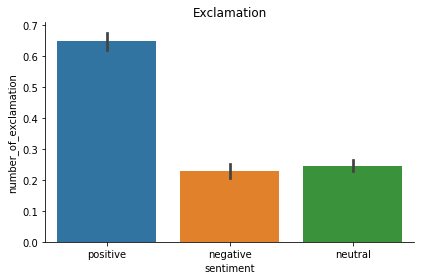

In [7]:
sns.barplot(x='sentiment', y='number_of_exclamation', data=train_data)
sns.despine()
plt.title('Exclamation')
plt.tight_layout()
plt.savefig('plots/number_of_exclamation')

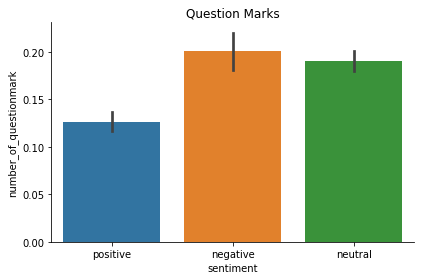

In [8]:
sns.barplot(x='sentiment', y='number_of_questionmark', data=train_data)
sns.despine()
plt.title('Question Marks')
plt.tight_layout()
plt.savefig('plots/number_of_question_marks')

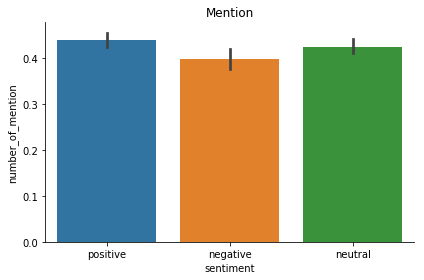

In [9]:
sns.barplot(x='sentiment', y='number_of_mention', data=train_data)
sns.despine()
plt.title('Mention')
plt.tight_layout()
plt.savefig('plots/number_of_mention')

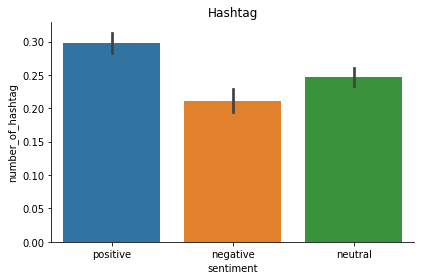

In [10]:
sns.barplot(x='sentiment', y='number_of_hashtag', data=train_data)
sns.despine()
plt.title('Hashtag')
plt.tight_layout()
plt.savefig('plots/number_of_hashtag')

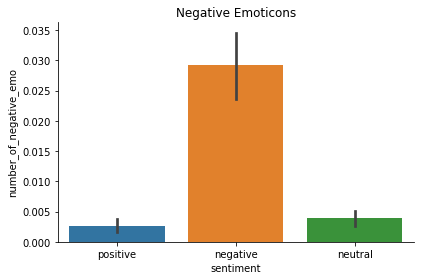

In [11]:
sns.barplot(x='sentiment', y='number_of_negative_emo', data=train_data)
sns.despine()
plt.title('Negative Emoticons')
plt.tight_layout()
plt.savefig('plots/number_of_negative_emojis')

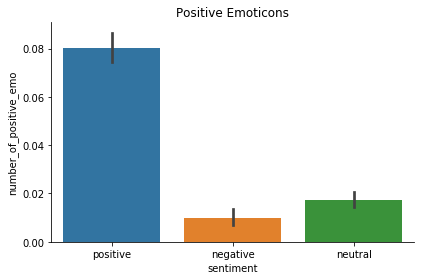

In [12]:
sns.barplot(x='sentiment', y='number_of_positive_emo', data=train_data)
sns.despine()
plt.title('Positive Emoticons')
plt.tight_layout()
plt.savefig('plots/number_of_positive_emojis')

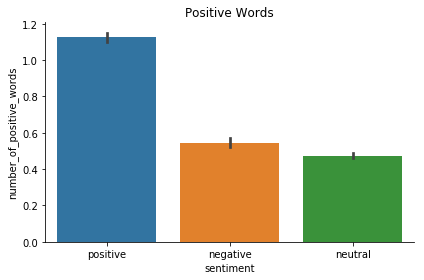

In [13]:
sns.barplot(x='sentiment', y='number_of_positive_words', data=train_data)
sns.despine()
plt.title('Positive Words')
plt.tight_layout()
plt.savefig('plots/number_of_positive_words')

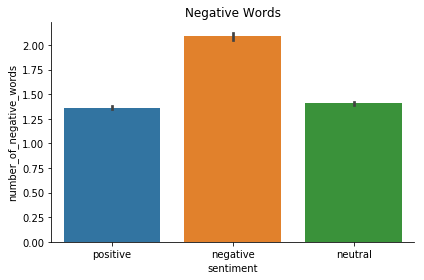

In [14]:
sns.barplot(x='sentiment', y='number_of_negative_words', data=train_data)
sns.despine()
plt.title('Negative Words')
plt.tight_layout()
plt.savefig('plots/number_of_negative_words')

In [15]:
train_data.columns

Index(['tweet_id', 'sentiment', 'tweet_text', 'clean_text',
       'number_of_exclamation', 'number_of_questionmark', 'number_of_hashtag',
       'number_of_mention', 'number_of_positive_emo', 'number_of_negative_emo',
       'number_of_positive_words', 'number_of_negative_words'],
      dtype='object')

In [16]:
train_data.head()

,tweet_id,sentiment,tweet_text,clean_text,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_positive_emo,number_of_negative_emo,number_of_positive_words,number_of_negative_words
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit go chapel hill sat happy,4,0,0,0,1,0,1,1
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott still shit watch rafa johnny deal,0,0,0,0,0,0,0,2
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,not gsp fan hate nick diaz can not wait,0,0,0,0,0,0,0,2
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general say israel iron dome can not d...,0,0,0,0,0,0,1,1
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran amour obama try establish tie mullah vi...,0,0,0,1,0,0,0,1


# Test Data

In [17]:
processed_data = test_data.copy()
add_extra_feature(test_data, test_data["tweet_text"])

In [18]:
test_data.head()

,tweet_id,tweet_text,clean_text,number_of_exclamation,number_of_questionmark,number_of_hashtag,number_of_mention,number_of_positive_emo,number_of_negative_emo,number_of_positive_words,number_of_negative_words
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",atlantic city ventnor margate ocean city area ...,0,0,0,1,0,0,0,1
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,musical awareness great big beautiful end time...,0,0,0,0,0,0,2,1
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,radio fm labour analyst shawn hat h cosatu rol...,0,0,0,0,0,0,0,2
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",kapan sih lo nge buk ti ngo mong doang susah s...,0,0,0,0,0,0,1,1
4,171874368908050432,"Excuse the connectivity of this live stream, f...",excuse connectivity live stream baba amr many ...,0,0,1,0,0,0,0,2


# Saving the Files

In [19]:
train_data.to_csv('data/train_added_features.csv')
test_data.to_csv('data/test_added_features.csv')